In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
publicacionTotal=pd.read_csv('../archivoCSV-Properati/properati-AR-2015-07-01-properties-sell-six_months.csv',low_memory=False)

In [102]:
publicacionTotal.describe

<bound method NDFrame.describe of                                              id  created_on operation  \
0      7a90b1769113405ec8a18dedcca7233164f65fc7  2015-07-22      sell   
1      d1df6791fabcbc402771752604b932a714b9fb14  2015-03-26      sell   
2      79f3b2215c9340af1aa91add0437a62e7f40eb6f  2015-03-05      sell   
3      c1bdfc35eb3e438b9f1a754a43ae8e15b6c0a241  2015-01-05      sell   
4      42adfd20cb7d7b9fd05c9d631415371a06a77cb1  2015-01-01      sell   
5      ab04855b1044ae72d1227359dbb5327b87106d0f  2015-01-01      sell   
6      fa98c219803ae6099d45c92795867cdeaa6ba543  2015-01-01      sell   
7      e09651f6b2b086555e1f7e824ac5bbc3736db4bc  2015-01-01      sell   
8      e0046250e366ba7d72c2aff9ad3f156addd3e4a0  2015-01-01      sell   
9      7db7ff40919fafc956537d1496c04d7d8b7a322f  2015-01-02      sell   
10     8fc0e79145f01f6d53d66162bef6b2b9708484fc  2015-01-02      sell   
11     d18999e17ccf5a3600ed55a82aaacc00596e549a  2015-01-02      sell   
12     280d1aa557

In [4]:
publicacionTotal.columns

Index(['id', 'created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

### ELIMINAMOS COLUMNAS QUE NO APORTAN AL ESTUDIO

operation, place_with_parent_names, country_name, geonames_id, lat-lon, price, currency, price_aprox_local_currency, price_per_m2, properati_url, title, image_thumbnail

In [5]:
publicacionTotal.drop(['operation', 'place_with_parent_names', 'country_name','geonames_id', 'lat-lon', 'price', 'currency', 'price_aprox_local_currency', 'price_per_m2', 'properati_url', 'title', 'image_thumbnail'],axis=1,inplace=True)

In [105]:
publicacionTotal.columns

Index(['id', 'created_on', 'property_type', 'place_name', 'state_name', 'lat',
       'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'description'],
      dtype='object')

## Verificamos con cuantos datos contamos para las zonas GBA y Cap Fed, antes de realizar la limpieza

In [106]:
publicacionTotal.loc[:, 'state_name'].value_counts()

Bs.As. G.B.A. Zona Norte        16257
Bs.As. G.B.A. Zona Oeste         9043
Capital Federal                  7386
Buenos Aires Costa Atlántica     4701
Bs.As. G.B.A. Zona Sur           2835
Buenos Aires Interior            1086
Santa Fe                         1085
Córdoba                           913
Misiones                          136
Entre Ríos                        123
Neuquén                           123
Río Negro                         104
La Pampa                          100
San Luis                           92
Mendoza                            58
Salta                              47
Chaco                              20
San Juan                           18
Tucumán                            17
Catamarca                          16
Jujuy                               9
La Rioja                            6
Tierra Del Fuego                    6
Corrientes                          2
Chubut                              2
Santa Cruz                          1
Name: state_

## Filtro los datos por Cap Fed y GBA

In [4]:
DatosGBA = publicacionTotal.loc[publicacionTotal.state_name.str.contains('Bs.As.'),:]
DatosCapFed = publicacionTotal.loc[publicacionTotal.state_name.str.contains('Capital Federal'),:]

In [5]:
DatosCapFed.loc[:, 'state_name'].value_counts()

Capital Federal    7386
Name: state_name, dtype: int64

In [109]:
DatosGBA.loc[:, 'state_name'].value_counts()

Bs.As. G.B.A. Zona Norte    16257
Bs.As. G.B.A. Zona Oeste     9043
Bs.As. G.B.A. Zona Sur       2835
Name: state_name, dtype: int64

# Limpieza

  Eliminamos los NAN'S que aparece en las columnas price_usd_per_m2 , surface_total_in_m2 y property_type. Esto se 
 considera así ya que al ser una Inmobiliaria no tiene sentido que no exista datos en esas 3 columnas.

In [6]:
DatosCapFed.dropna(subset=['price_usd_per_m2','surface_total_in_m2','property_type'],inplace=True)
DatosGBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2','property_type'],inplace=True)


/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
DatosGBA.loc[:, 'state_name'].value_counts()

Bs.As. G.B.A. Zona Norte    11625
Bs.As. G.B.A. Zona Oeste     3288
Bs.As. G.B.A. Zona Sur       1471
Name: state_name, dtype: int64

In [112]:
DatosCapFed.loc[:, 'state_name'].value_counts()

Capital Federal    4527
Name: state_name, dtype: int64

# Análisis de propiedades en relación a los barrios

###  1) Verificamos con cuantos datos contamos de property_type

In [170]:
DatosCapFed.loc[:,'property_type'].value_counts()

apartment    3767
house         318
PH            260
store         182
Name: property_type, dtype: int64

In [171]:
DatosGBA.loc[:,'property_type'].value_counts()

house        10395
apartment     4743
PH             964
store          282
Name: property_type, dtype: int64

### 2) Filtramos las columnas con las que vamos a trabajar

In [7]:
PropiedadesCapFed=DatosCapFed[['property_type', 'place_name','surface_total_in_m2',
                               'price_usd_per_m2']]

In [8]:
PropiedadesGBA=DatosGBA[['property_type', 'place_name','state_name','surface_total_in_m2',
                               'price_usd_per_m2']]

### 3) Limpieza de Nans que pueda existir en la columna place_name 

Obs: En la limpieza hemos detectado que dentro de los barrios de Cap Fed registra un barrio como Cap Fed, esto lo hemos considerado un absurdo; por ende también lo vamos a eliminar

In [9]:
PropiedadesCapFed.dropna(subset=['place_name'],inplace=True)
PropiedadesGBA.dropna(subset=['place_name'],inplace=True)

/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
grouped = PropiedadesCapFed.loc[:,['place_name','property_type']].groupby('place_name')
grouped.get_group('Capital Federal')

,place_name,property_type
3545,Capital Federal,apartment
6346,Capital Federal,house
6915,Capital Federal,house
7354,Capital Federal,PH
8900,Capital Federal,house
10792,Capital Federal,apartment
12505,Capital Federal,apartment
12511,Capital Federal,store
22059,Capital Federal,store
23380,Capital Federal,PH


Eliminamos los barrios que aparece con el nombre de Capital Federal

In [11]:
PropiedadesCapFed=PropiedadesCapFed[PropiedadesCapFed['place_name']!='Capital Federal']

### 4) Verificamos cuantos datos se han limpiado

Obs: Hemos observado que se han limpiado pocos datos en este caso; esto nos lleva a pensar que han tenido un especial cuidado a la hora de recargar los datos respecto al tipo de propiedad que existe en cada barrio 


####  *PREGUNTA 1: ¿Cuantas y cuales propiedades se han vendido tanto en Cap Fed y GBA?
RTA: Es claro que existe mayor registro de ventas en XXXX que YYYYYYY 

In [191]:
PropiedadesCapFed.loc[:,'property_type'].value_counts()

apartment    3767
house         318
PH            260
store         182
Name: property_type, dtype: int64

In [192]:
PropiedadesGBA.loc[:,'property_type'].value_counts()

house        10393
apartment     4743
PH             964
store          282
Name: property_type, dtype: int64

### 5) Ordenamos en forma ascendete el precio de las propiedades con el fin de verificar si existen anomalías 

No se detecto anomalías

In [12]:
TiendasEnGBA=PropiedadesGBA.loc[PropiedadesGBA.property_type=='store',:].sort_values('price_usd_per_m2',ascending=True)

In [13]:
TiendasEnCapFed=PropiedadesCapFed.loc[PropiedadesCapFed.property_type=='store',:].sort_values('price_usd_per_m2',ascending=True)

In [14]:
DptoEnCapFed=PropiedadesCapFed.loc[PropiedadesCapFed.property_type=='apartment',:].sort_values('price_usd_per_m2',ascending=True)

In [15]:
DptoEnGBA=PropiedadesGBA.loc[PropiedadesGBA.property_type=='apartment',:].sort_values('price_usd_per_m2',ascending=True)

In [16]:
PHEnCapFed=PropiedadesCapFed.loc[PropiedadesCapFed.property_type=='PH',:].sort_values('price_usd_per_m2',ascending=True)

In [17]:
PHEnGBA=PropiedadesGBA.loc[PropiedadesGBA.property_type=='PH',:].sort_values('price_usd_per_m2',ascending=True)

In [18]:
CasasEnCapFed=PropiedadesCapFed.loc[PropiedadesCapFed.property_type=='house',:].sort_values('price_usd_per_m2',ascending=True)

In [19]:
CasasEnGBA=PropiedadesGBA.loc[PropiedadesGBA.property_type=='house',:].sort_values('price_usd_per_m2',ascending=True)

### 6) Resultados y gráficos

#### 6.1) Capital Federal: Promedio total y cantidad total según el tipo de propiedad y barrio

In [279]:
grupoCapFed = PropiedadesCapFed.loc[:,['place_name','property_type','price_usd_per_m2']].\
          groupby(['place_name','property_type']).agg(['mean','count'])
grupoCapFed    

price_usd_per_m2      
                                              mean count
place_name          property_type                       
Abasto              apartment          1881.145732    11
                    store              2175.775776     3
Agronomía           apartment          2158.562226     4
Almagro             PH                 1508.701809    11
                    apartment          1824.567591   283
                    house              1291.390182     6
                    store              2297.564184     5
Balvanera           PH                 1138.693702     3
                    apartment          1798.117046   109
                    house              1718.750000     1
                    store              3716.812032     7
Barracas            PH                 1386.931397     3
                    apartment          2173.701378    69
                    house               899.546478     3
Barrio Norte        PH                 1336.174944     2
                    apartment          2682.574539   162
                    house              1947.898575     6
                    store              4234.932565    17
Belgrano            PH                 2008.038339     6
                    apartment          2742.885854   374
                    house              2560.075818    40
                    store              3055.265872    11
Boca                PH                 1323.498139     3
                    apartment          1420.898510    25
                    house               730.257145     3
                    store              1162.878788     2
Boedo               PH                 1585.660831     5
                    apartment          1981.419426   178
                    house              1116.513761     5
                    store              2563.559823     3
...                                            ...   ...
Villa General Mitre apartment           930.059524     6
                    house              1880.000000     1
Villa Lugano        PH                  870.708842     5
                    apartment          1178.980588    32
                    house               856.387362    14
                    store              1200.483092     2
Villa Luro          PH                 1223.654994     5
                    apartment          1753.987954     8
                    house              1050.825522     4
Villa Ortuzar       PH                 1453.846154     1
                    apartment          2196.067248     4
                    house              1026.315789     2
                    store              1329.409306     2
Villa Pueyrredón    PH                 1196.581197     2
                    apartment          1648.479327    12
                    house              1205.729920     8
Villa Real          PH                 1267.678267     4
                    apartment          1819.523810     2
                    house              1204.819277     1
Villa Santa Rita    PH                 1410.588235     1
                    apartment          2025.346263     6
                    house               903.225806     1
Villa Urquiza       PH                 1221.723521     6
                    apartment          2535.428987   186
                    house              4799.551839     6
                    store              2346.826710     8
Villa del Parque    PH                 1269.109832     7
                    apartment          1897.671007    45
                    house              2051.792829     1
                    store              1375.000000     1

[195 rows x 2 columns]

#### PREGUNTA: ¿CUAL ES EL BARRIO CON MAYOR Y MENOR CANTIDAD DE VENTAS DE PROPIEDADES?
RTA:

In [27]:
PropiedadesCapFed.loc[:,'place_name'].value_counts()

Belgrano                736
Palermo                 712
Caballito               392
Villa Crespo            372
Almagro                 358
Villa Urquiza           350
Flores                  285
Nuñez                   266
Balvanera               255
Barrio Norte            248
Boedo                   228
Recoleta                199
Saavedra                181
Puerto Madero           163
San Cristobal           158
San Telmo               146
Barracas                117
Colegiales              103
Floresta                101
Palermo Hollywood       100
Parque Chacabuco         93
Coghlan                  87
Villa Devoto             82
Villa Lugano             79
Villa Luro               79
Villa del Parque         77
Villa Pueyrredón         74
Parque Patricios         69
Congreso                 68
Once                     68
Mataderos                68
Retiro                   59
Villa General Mitre      58
Liniers                  56
San Nicolás              55
Palermo Chico       

#### 6.2) GBA:  Histogramas según  la cantidad de propiedades en cada barrio y Grafico según el promedio por metro cuadrado en dolar en cada barrio 

#### PARA EL INFORME IMPRESO A ENTREGAR PREGUNTA : ¿Cuál fue el barrio donde existe la mayor venta de departamentos?
Rta:

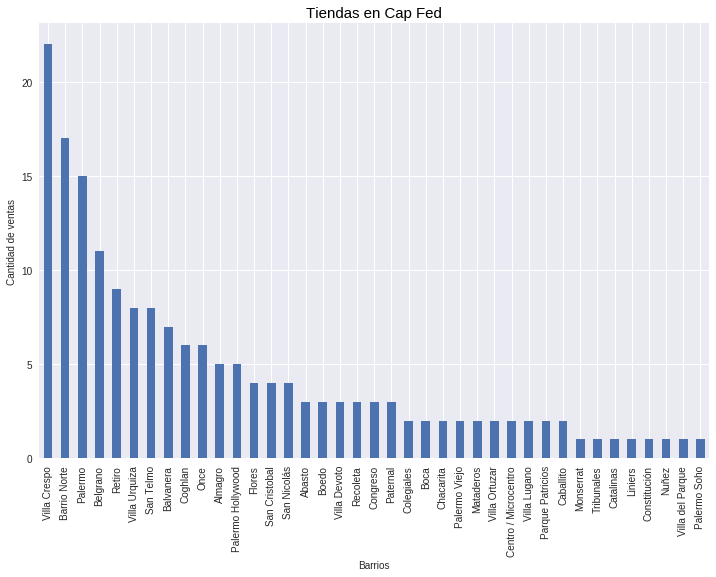

In [22]:
f = plt.figure()

plt.title ('Tiendas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)

TiendasCapFed_hist = TiendasEnCapFed['place_name'].value_counts()
TiendasCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));


In [26]:
TopTenTiendas=TiendasEnCapFed.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean','count'])
TopTenTiendas    

price_usd_per_m2      
                                 mean count
place_name                                 
Abasto                    2175.775776     3
Almagro                   2297.564184     5
Balvanera                 3716.812032     7
Barrio Norte              4234.932565    17
Belgrano                  3055.265872    11
Boca                      1162.878788     2
Boedo                     2563.559823     3
Caballito                 1404.312668     2
Catalinas                 3217.391304     1
Centro / Microcentro      2254.073927     2
Chacarita                 2058.201058     2
Coghlan                   2850.187932     6
Colegiales                1912.991236     2
Congreso                  2194.706756     3
Constitución              1100.000000     1
Flores                    1505.850834     4
Liniers                    740.000000     1
Mataderos                  800.531915     2
Monserrat                  804.828974     1
Nuñez                     2791.666667     1
Once                      3097.575486     6
Palermo                   4538.539745    15
Palermo Hollywood         3160.467430     5
Palermo Soho              4000.000000     1
Palermo Viejo             3870.689655     2
Parque Patricios          1687.970783     2
Paternal                   971.100216     3
Recoleta                  5100.697542     3
Retiro                    3121.349173     9
San Cristobal             1055.546705     4
San Nicolás               2369.235812     4
San Telmo                 1933.228667     8
Tribunales                3950.000000     1
Villa Crespo              3414.138540    22
Villa Devoto              2332.256079     3
Villa Lugano              1200.483092     2
Villa Ortuzar             1329.409306     2
Villa Urquiza             2346.826710     8
Villa del Parque          1375.000000     1

####  PREGUNTA: ¿Cuál es el barrio mas caro por metro cuadrado en dolar?

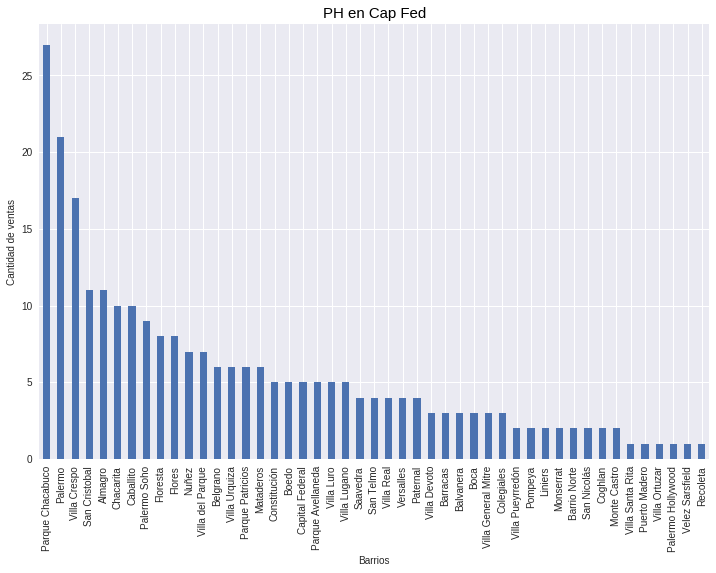

In [342]:
f = plt.figure()

plt.title ('PH en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)

PHCapFed_hist = PHEnCapFed['place_name'].value_counts()
PHCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

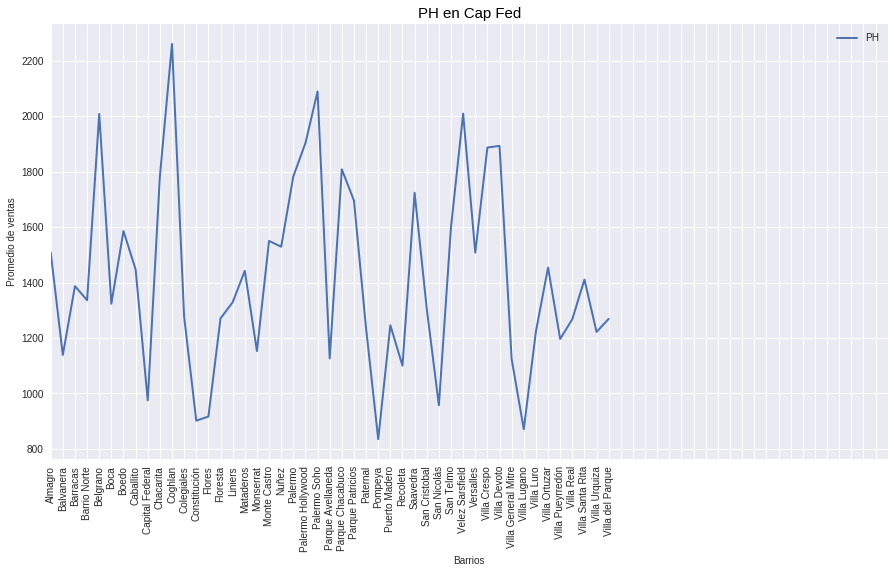

In [343]:
PropiedadesCapFed.loc[PropiedadesCapFed.property_type.str.contains('PH'),\
                 ['place_name','price_usd_per_m2']].groupby('place_name').mean()\
                 .loc[:,'price_usd_per_m2'].plot(rot=90,xticks=range(0,70),linewidth=2,figsize=(15,8),label='PH');
plt.legend();
plt.title ('PH en Cap Fed',color='black', fontsize=15)
plt.ylabel('Promedio de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)
plt.show();       

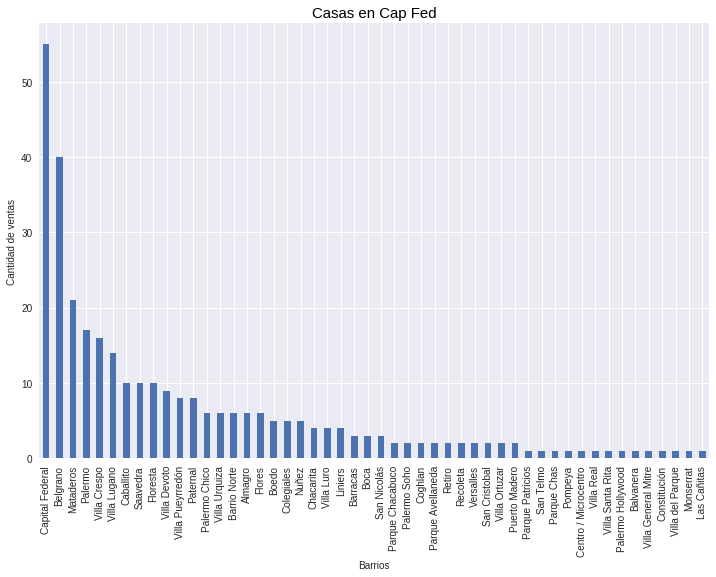

In [344]:
f = plt.figure()

plt.title ('Casas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)

CasasCapFed_hist = CasasEnCapFed['place_name'].value_counts()
CasasCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

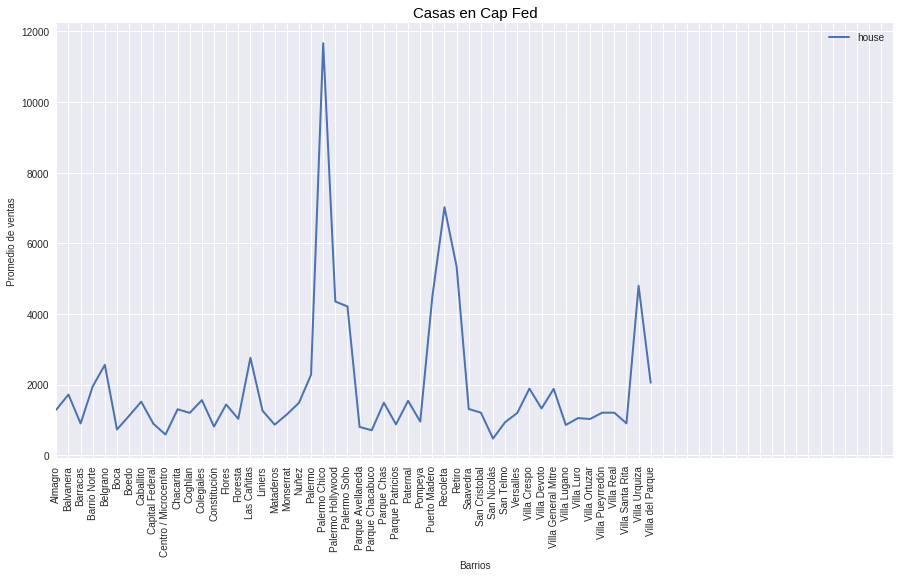

In [345]:
PropiedadesCapFed.loc[PropiedadesCapFed.property_type.str.contains('house'),\
                 ['place_name','price_usd_per_m2']].groupby('place_name').mean()\
                 .loc[:,'price_usd_per_m2'].plot(rot=90,xticks=range(0,70),linewidth=2,figsize=(15,8),label='house');

plt.legend();
plt.title ('Casas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Promedio de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)
plt.show();    

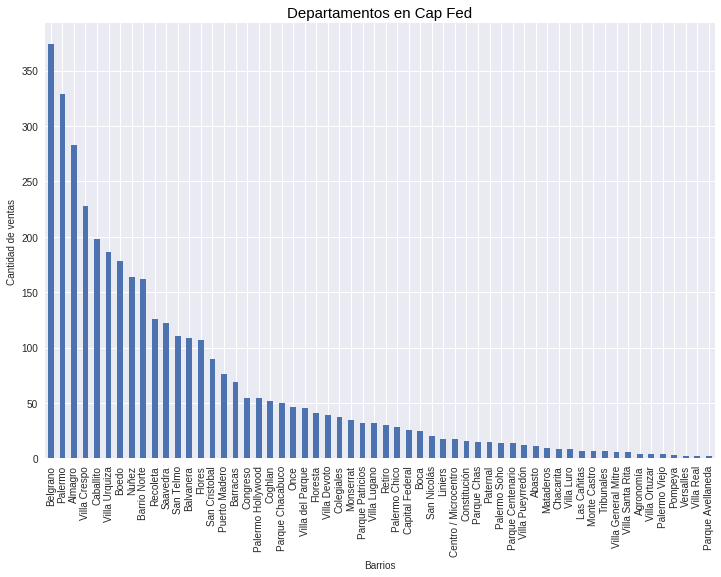

In [346]:
f = plt.figure()

plt.title ('Departamentos en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)

DptoCapFed_hist = DptoEnCapFed['place_name'].value_counts()
DptoCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

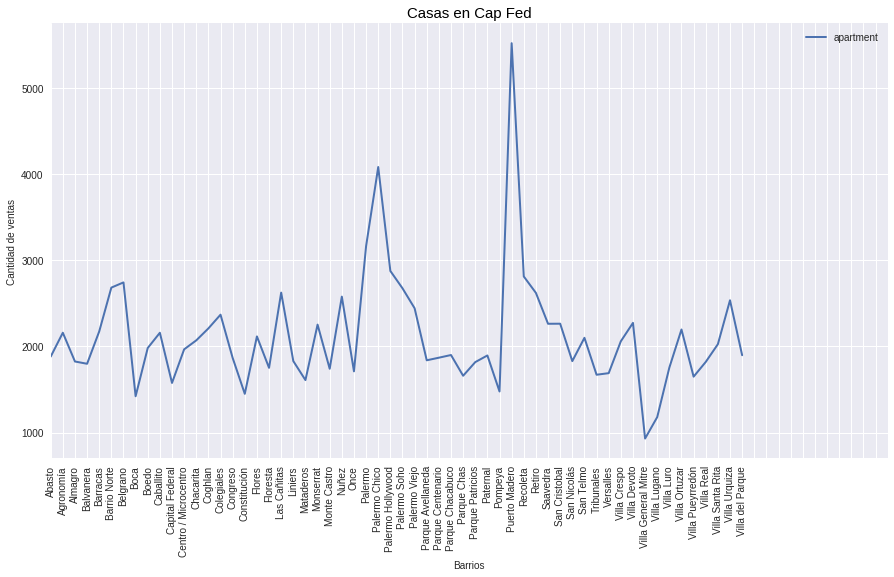

In [347]:
PropiedadesCapFed.loc[PropiedadesCapFed.property_type.str.contains('apartment'),\
                 ['place_name','price_usd_per_m2']].groupby('place_name').mean()\
                 .loc[:,'price_usd_per_m2'].plot(rot=90,xticks=range(0,70),linewidth=2,figsize=(15,8),label='apartment');

plt.legend();
plt.title ('Casas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)
plt.show();    

#### 6.4) GBA: Promedio total y cantidad total según el tipo de propiedad y barrio

In [249]:
grupoGBA = PropiedadesGBA.loc[:,['state_name','place_name','property_type','price_usd_per_m2']].\
          groupby(['state_name','place_name','property_type']).agg(['mean','count'])
grupoGBA

price_usd_per_m2  \
                                                                                       mean   
state_name               place_name                          property_type                    
Bs.As. G.B.A. Zona Norte  Country Maschwitz Club             house               923.076923   
                         Acassuso                            PH                 1538.500103   
                                                             apartment          2536.492507   
                                                             house              1179.288742   
                                                             store              4161.748690   
                         Altamira                            house              1508.417508   
                         Altos del Pilar                     house               259.259259   
                         Barrancas de San Jose               house              1350.344208   
                         Barrancas de Santa María            house              1032.377778   
                         Barrio Alamo Alto                   house               840.000000   
                         Barrio Cabos del Lago               house              1190.476190   
                         Barrio Ceibos                       house              1080.402010   
                         Barrio Cerrado "La Cañada de Pilar" house              1150.804719   
                         Barrio Cerrado "La Escondida"       house              1543.750000   
                         Barrio Cerrado "La Otilia"          house               725.000000   
                         Barrio Cerrado "Pilar House"        house              1460.606061   
                         Barrio Cerrado "Roble Joven"        house              1335.227273   
                         Barrio Cerrado "Soles de Pilar"     house              1283.185841   
                         Barrio Cerrado "Tres Horquetas"     house              1593.406593   
                         Barrio Cerrado El Lucero            house              1521.739130   
                         Barrio Cerrado Las Casuarinas       house               837.837838   
                         Barrio Cerrado River Oaks           house              1200.000000   
                         Barrio El Golf                      apartment          2319.092686   
                                                             house              1859.836460   
                         Barrio La Alameda                   apartment          2054.794521   
                                                             house              1733.333333   
                         Barrio La Isla                      house              1477.272727   
                         Barrio Los Alisos                   house              2030.451263   
                         Barrio Los Castores                 apartment          1911.764706   
                                                             house              1892.816670   
...                                                                                     ...   
Bs.As. G.B.A. Zona Sur   San Francisco Solano                house               866.666667   
                                                             store               774.647887   
                         San Vicente                         house              1068.163681   
                         Sarandi                             apartment          1433.241758   
                                                             house               681.806228   
                                                             store              1214.285714   
                         Solar del Bosque                    house              1275.862069   
                         Sourigues                           house               116.129032   
                         Temperley                           apartment          1314.

#### 6.3) GBA:  Histogramas según  la cantidad de propiedades en cada barrio y Grafico según el promedio por metro cuadrado en dolar en cada barrio 

La conclusión que queremos sacar en GBA es donde existe mayor cantidad de ventas de las propiedades, ya sea GBA zona Sur, Norte u Oeste

# Análisis de Expensas


###  1) Verificamos con cuantos datos contamos de expensas  y property_type

In [169]:
DatosGBA.loc[:,['state_name','property_type','expenses']].groupby(['state_name','property_type'])\
                .agg(['count'])  #total expensas=869

expenses
                                          count
state_name               property_type         
Bs.As. G.B.A. Zona Norte PH                  16
                         apartment          237
                         house               74
                         store                9
Bs.As. G.B.A. Zona Oeste PH                  17
                         apartment          116
                         house               57
                         store                3
Bs.As. G.B.A. Zona Sur   PH                  11
                         apartment          231
                         house               90
                         store                8

In [116]:
DatosCapFed.loc[:,['property_type','expenses']].groupby(['property_type'])\
                .agg(['count']) #total expensas =1212

,expenses
,count
property_type,
PH,36
apartment,1156
house,3
store,17


### 2) Filtramos las 5 columnas; ya que para nuestro análisis de expensas será en base a las zonas, el tipo de propiedad y la superficie total por m2.

Nota: Consideramos superficie total por m2; ya que el fín de esto es encontrar alguna anomalía del valor de las expensas respecto a los datos que nos aporta superficie total m2.

In [189]:
ExpensasCapFed=DatosCapFed[['property_type','place_name','surface_total_in_m2',
                             'price_usd_per_m2','expenses']]

In [188]:
ExpensasGBA=DatosGBA[['property_type','place_name','state_name','surface_total_in_m2',
                             'price_usd_per_m2','expenses']]

### 3) Limpiamos los Nan's que exista en la columna expenses, place_name y  property_type; ya que las expensas será evaluado según el tipo de propiedad y barrio

In [190]:
ExpensasCapFed.dropna(subset=['expenses','place_name'],inplace=True)
ExpensasGBA.dropna(subset=['expenses','place_name'],inplace=True)

/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 4) verificamos ctos datos se han limpiado
Observamos que se realizo en forma correcta la limpieza, ya que la cantidad de datos que existe (según pto 2) coinciden


In [130]:
ExpensasGBA.loc[:,['property_type','expenses']].groupby(['property_type'])\
                .agg(['count'])  #total expensas=869

,expenses
,count
property_type,
PH,44
apartment,584
house,220
store,20


In [131]:
ExpensasCapFed.loc[:,['property_type','expenses']].groupby(['property_type'])\
                .agg(['count'])  #total expensas=869

,expenses
,count
property_type,
PH,36
apartment,1156
house,3
store,17


Visualizamos con ctos datos de propiedades contados, despúes de la limpieza

In [132]:
ExpensasGBA.loc[:,'property_type'].value_counts()

apartment    584
house        220
PH            44
store         20
Name: property_type, dtype: int64

In [133]:
ExpensasCapFed.loc[:,'property_type'].value_counts()

apartment    1156
PH             36
store          17
house           3
Name: property_type, dtype: int64

### 5) Ordenamos en forma descendentes las expensas con el fín de analizar si existen datos exageradamente fuera de los parámetros normales

#### 5.1) Análizamos las propiedades del tipo 'house' en Cap Fed
Vamos a considerar en limpiar los datos del tipo 'house' en Cap Fed, ya que en la realidad una propiedad de este tipo no suele pagar expensas; lo consideraremos este tipo de dato como un absurdo. A la vez al observar el monto de las expensas para esas 3 propiedades suma al absurdo.

In [134]:
ExpensasDelTipoCasaCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='house',:].sort_values('expenses',ascending=False)
ExpensasDelTipoCasaCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
36436,house,Barrio Norte,400.0,1475.000000,200.0
30788,house,Floresta,230.0,891.304348,1.0
36828,house,Villa Crespo,200.0,4250.000000,1.0


#### 5.2) Análizamos las propiedades del tipo 'house' en GBA
     
  Consideraciones:

1) Un particular cuidado, ya que en la actualidad existe casas en barrios cerrados y cabe la posibilidad
de que paguen expensas.

2) Limpiaremos aquellos datos que aparezcan como expensas menor a $100; ya que lo consideramos como un absurdo


In [135]:
ExpensasDelTipoCasaGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='house',:].sort_values('expenses',ascending=False)
ExpensasDelTipoCasaGBA

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
42271,house,San Vicente,500.0,660.000000,29000.0
41984,house,Canning,350.0,300.000000,12000.0
37300,house,Nordelta,450.0,3155.555556,12000.0
42313,house,Nordelta,398.0,3266.331658,10000.0
37732,house,Nordelta,540.0,1574.074074,9000.0
38358,house,Nordelta,600.0,2416.666667,8500.0
40301,house,Malvinas Argentinas,1200.0,350.000000,8200.0
37293,house,Nordelta,270.0,2500.000000,8000.0
42324,house,La Plata,130.0,3307.692308,8000.0
961,house,Lanús,1400.0,160.714286,7000.0


#### 5.3) Análizamos las propiedades del tipo 'PH' en Cap Fed
Consideraciones:

1)En la actualidad, existen PH que contratan en forma particular la limpieza de sus pasillos y arreglos como un 
gasto en comùn entre todos los propietarios y es considerado como parte del gasto de una expensa

2)Vamos a considerar en limpiar los datos de expensas menores a 100 y mayores a 1000 

In [136]:
ExpensasDelTipoPHCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='PH',:].sort_values('expenses',ascending=False)
ExpensasDelTipoPHCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
41275,PH,Almagro,110.0,2000.000000,1800.0
35301,PH,Almagro,118.0,2118.644068,1000.0
40318,PH,Villa Crespo,122.0,2090.163934,950.0
1252,PH,Palermo Soho,171.0,2046.783626,900.0
36710,PH,Belgrano,44.0,2147.727273,900.0
1247,PH,Palermo Soho,171.0,2046.783626,900.0
546,PH,Palermo Soho,171.0,2046.783626,900.0
1249,PH,Palermo Soho,171.0,2046.783626,900.0
1251,PH,Palermo Soho,171.0,2046.783626,900.0
1248,PH,Palermo Soho,171.0,2046.783626,900.0


#### 5.4) Análizamos las propiedades del tipo 'PH' en GBA
Consideraciones:

1)En la actualidad, existen propietarios de PH que contratan en forma particular la limpieza de sus pasillos y arreglos como un gasto en comùn entre todos los propietarios y es considerado como parte del gasto de una expensa

2)Vamos a considerar en limpiar los datos de expensas menores a 100 y mayores a 1000 

In [137]:
ExpensasDelTipoPHGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='PH',:].sort_values('expenses',ascending=False)
ExpensasDelTipoPHGBA

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
19454,PH,Quilmes,72.0,2083.333333,1700.0
3212,PH,Quilmes,38.0,1578.947368,1300.0
8773,PH,Bernal,50.0,1600.000000,650.0
18812,PH,Villa Ballester,50.0,1440.000000,400.0
18813,PH,Villa Ballester,50.0,1400.000000,400.0
18815,PH,Villa Ballester,52.0,1346.153846,400.0
18737,PH,Olivos,55.0,2527.272727,320.0
21982,PH,Ramos Mejía,59.0,1355.932203,300.0
16330,PH,Morón,37.0,1756.756757,295.0
34537,PH,Castelar,45.0,1111.111111,130.0


#### 5.5) Análizamos las propiedades del tipo Store en Cap Fed
Consideraciones:

1)En la actualidad, existen Store que se encuentran en la PB de un Edificio y ser parte de un mismo consorcio; por ende es posible que este no este exento en pagar expensas.

2)Vamos a considerar en limpiar los datos de expensas menores a 100

In [138]:
ExpensasDelTipoStoreCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='store',:].sort_values('expenses',ascending=False)
ExpensasDelTipoStoreCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
41616,store,San Nicolás,151.0,1801.324503,8300.0
36582,store,San Telmo,256.0,1015.625000,4500.0
41638,store,San Nicolás,115.0,3200.000000,4200.0
41619,store,San Nicolás,593.0,2529.510961,4000.0
12595,store,Barrio Norte,48.0,20833.333333,2500.0
28617,store,Almagro,70.0,616.253857,1650.0
22059,store,Capital Federal,90.0,1077.777778,1400.0
40718,store,Belgrano,42.0,1190.476190,1200.0
32921,store,Balvanera,263.0,4942.965779,1111.0
41877,store,Belgrano,700.0,1857.142857,1111.0


####  5.6) Análizamos las propiedades del tipo Store en GBA
Consideraciones:

1)En la actualidad, existen Store que se encuentran en la PB de un Edificio y ser parte de un mismo consorcio; por ende es posible que este no este exento en pagar expensas.

2)Vamos a considerar en limpiar los datos de expensas menores a 100

In [139]:
ExpensasDelTipoStoreGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='store',:].sort_values('expenses',ascending=False)
ExpensasDelTipoStoreGBA

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
2330,store,Pilar,72.0,1069.444444,3500.0
32699,store,Martínez,300.0,1966.666667,3100.0
41900,store,Quilmes,4500.0,555.555556,1111.0
42391,store,Avellaneda,4290.0,1048.951049,1111.0
42303,store,Del Viso,420.0,1142.857143,1111.0
41902,store,Olivos,300.0,1333.333333,1111.0
42477,store,Banfield,36.0,1388.888889,170.0
42130,store,Boulogne Sur Mer,232.0,1831.896552,111.0
42069,store,La Plata,20.0,5500.000000,70.0
41367,store,Lanús,50.0,2200.000000,10.0


####  5.7) Análizamos las propiedades del tipo Apartment en Cap Fed
Consideraciones:

1)Vamos a considerar en limpiar los datos de expensas menores a 100

2)CHICOS QUE OPINAN EN LAS EXPENSAS MAYORES A 10000???????????????????? 

In [140]:
ExpensasDelTipoDepCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='apartment',:].sort_values('expenses',ascending=False)
ExpensasDelTipoDepCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
3453,apartment,Puerto Madero,444.0,4954.954955,35500.0
38457,apartment,Palermo,115.0,6434.782609,35000.0
19440,apartment,Belgrano,280.0,4464.285714,20000.0
37625,apartment,Recoleta,268.0,2425.373134,19625.0
38277,apartment,Barrio Norte,370.0,3783.783784,19000.0
3202,apartment,Almagro,466.0,836.909871,17000.0
32885,apartment,Palermo Chico,260.0,3769.230769,15000.0
39485,apartment,Nuñez,600.0,1166.666667,14000.0
31094,apartment,Palermo,232.0,2327.586207,13000.0
39263,apartment,Palermo,288.0,3298.611111,13000.0


#### 5.8) Análizamos las propiedades del tipo Apartment en GBA
Consideraciones:

1)Vamos a considerar en limpiar los datos de expensas menores a 100

2)CHICOS QUE OPINAN EN LAS EXPENSAS MAYORES A 10000????????????????????

In [141]:
ExpensasDelTipoDepGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='apartment',:].sort_values('expenses',ascending=False)
ExpensasDelTipoDepGBA

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
41814,apartment,Nordelta,207.0,2657.004831,11000.0
31736,apartment,San Isidro,166.0,2530.120482,8500.0
18996,apartment,San Isidro,209.0,3062.200957,7000.0
41758,apartment,Nordelta,125.0,2800.000000,7000.0
38323,apartment,Nordelta,111.0,2657.657658,6500.0
36920,apartment,Olivos,132.0,2500.000000,6000.0
41789,apartment,Nordelta,129.0,2209.302326,5800.0
41316,apartment,Banfield,80.0,1937.500000,5300.0
35992,apartment,San Fernando,113.0,2566.371681,5100.0
26397,apartment,Nordelta,128.0,2109.375000,5000.0


### 6) Realizamos la limpieza , analizado previamente en el pto 5

Chicos me hubiese gustado realizar una limpieza para el pto 5, pero no lo se hacer. Solo se me ocurre tomar los datos segun los rangos que fue analizado en el pto 5. Bueno espero que me hayan entendido


### 6 bis) Filtramos los datos, según lo analizado en el punto 5

In [318]:
grupoDepCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='apartment',:].loc[ExpensasCapFed.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [326]:
grupoCasasCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='house',:].loc[ExpensasCapFed.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [327]:
grupoTiendasCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='store',:].loc[ExpensasCapFed.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [328]:
grupoPHCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='PH',:].loc[ExpensasCapFed.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [329]:
grupoDepGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='apartment',:].loc[ExpensasGBA.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [330]:
grupoCasasGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='house',:].loc[ExpensasGBA.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [331]:
grupoTiendasGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='store',:].loc[ExpensasGBA.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [332]:
grupoPHGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='PH',:].loc[ExpensasGBA.expenses>100,:]\
        .sort_values('expenses',ascending=False)